In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_trades(df: pd.DataFrame, buyer=None, seller=None, symbol=None):
    match_buyer = df["buyer"] == buyer if buyer != "" else df["buyer"].str.match(".*")
    match_seller = df["seller"] == seller if seller != "" else df["seller"].str.match(".*")
    match_symbol = df["symbol"] == symbol
    return df[match_buyer & match_seller & match_symbol]

def plot_trades(df: pd.DataFrame, buyer, seller, symbol):
    trades = get_trades(df, buyer, seller, symbol)
    plt.figure(figsize=(12, 6))
    plt.plot(trades["price"], marker='', linestyle='-', color='b', label=buyer + " buys from " + seller)
    plt.title("Trades analysis")
    plt.xlabel("Price")
    plt.ylabel("Timestamp"),
    plt.legend()
    plt.grid(True)
    plt.show()

['Raj' 'Rhianna' 'Ruby' 'Valentina' 'Vinnie' 'Vladimir']
['Raj' 'Rhianna' 'Ruby' 'Valentina' 'Vinnie' 'Vladimir']


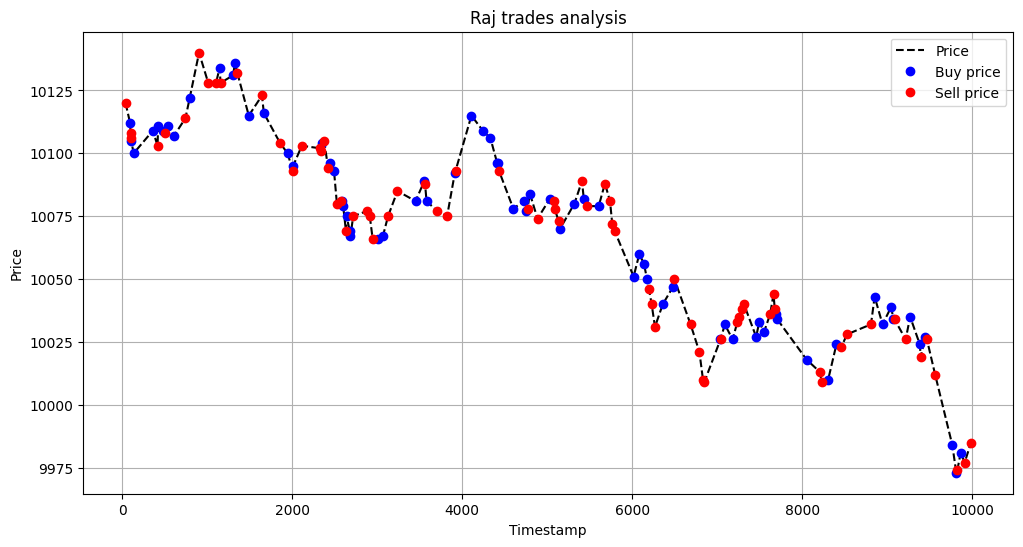

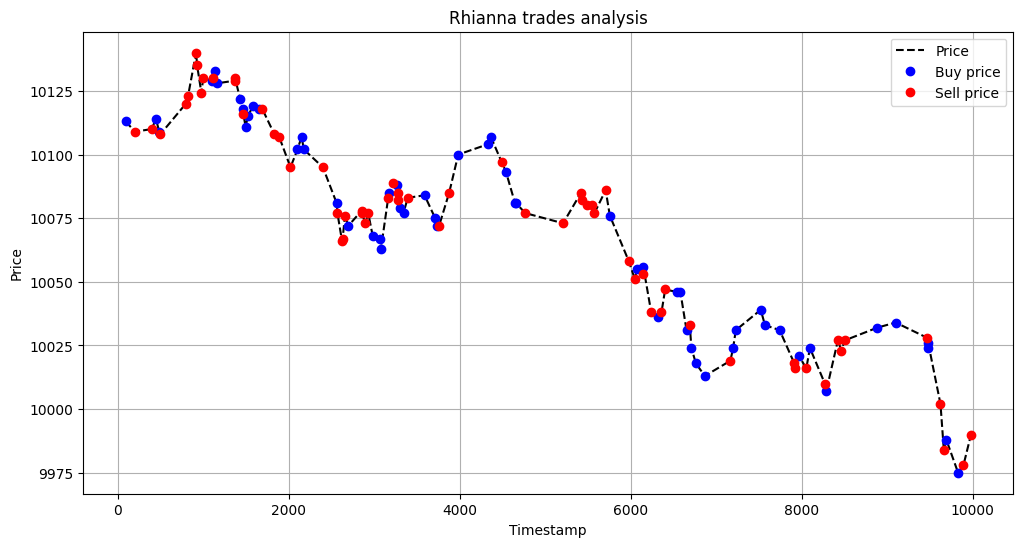

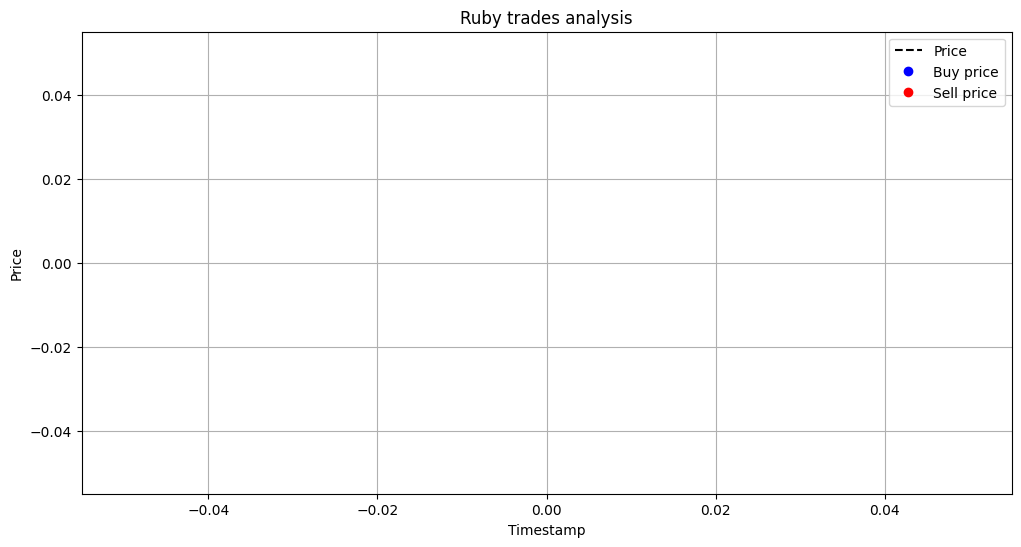

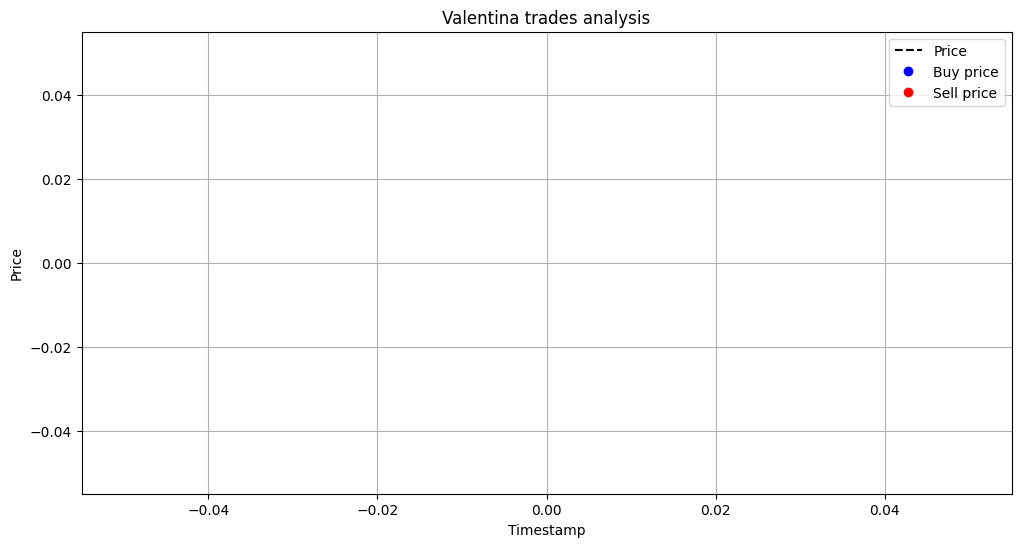

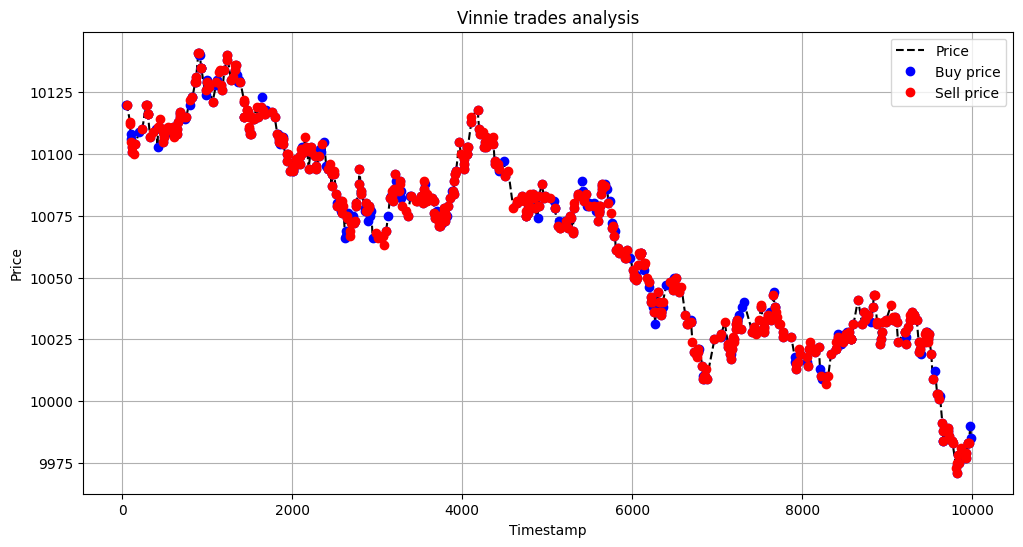

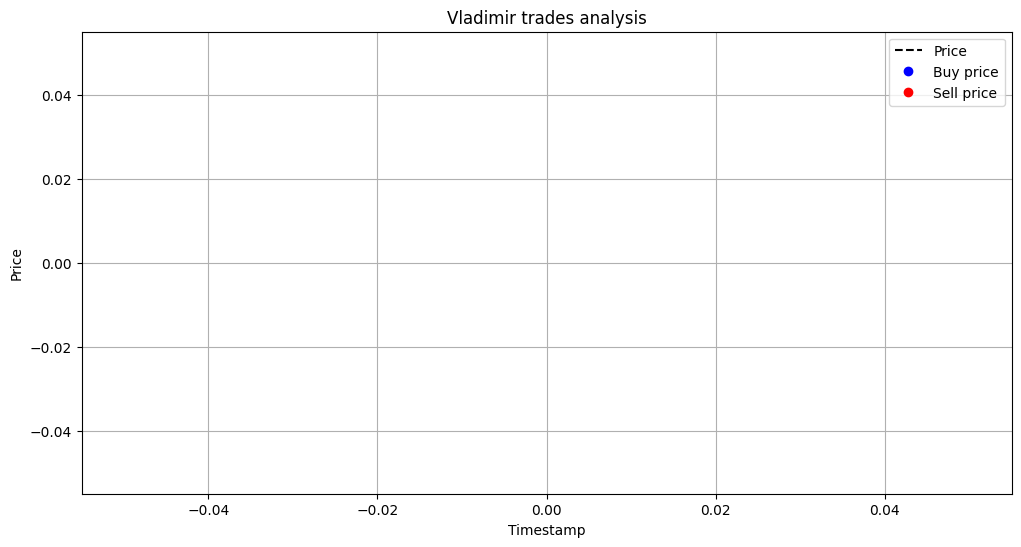

In [61]:
csv_file_path = "./data/round_5/trades_round_4_day_2_wn.csv"
df = pd.read_csv(csv_file_path, sep=';')

products = np.unique(df["symbol"])
buyers = np.unique(df["buyer"])
sellers = np.unique(df["seller"])

print(buyers)
print(sellers)

for buyer in buyers:
    prod = "COCONUT"
    buy_trades = get_trades(df, buyer, "", prod)[:]
    sell_trades = get_trades(df, "", buyer, prod)[:]
    
    x_buy, y_buy = [], []
    x_sell, y_sell = [], []
    x_trade, y_trade = [], []
    
    for row in buy_trades.iterrows():
        x_buy.append(round(row[1]["timestamp"] / 100))
        y_buy.append(round(row[1]["price"]))
    
    for row in sell_trades.iterrows():
        x_sell.append(round(row[1]["timestamp"] / 100))
        y_sell.append(round(row[1]["price"]))
    
    i = 0
    j = 0
    while i < len(y_buy) and j < len(y_sell):
        if x_buy[i] <= x_sell[j]:
            x_trade.append(x_buy[i])
            y_trade.append(y_buy[i])
            i += 1
        else:
            x_trade.append(x_sell[j])
            y_trade.append(y_sell[j])
            j += 1
    
    while i < len(y_buy):
        x_trade.append(x_buy[i])
        y_trade.append(y_buy[i])
        i += 1
    
    while j < len(y_sell):
        x_trade.append(x_sell[j])
        y_trade.append(y_sell[j])
        j += 1
    
    
    plt.figure(figsize=(12, 6))
    plt.plot(x_trade, y_trade, marker='', linestyle='--', color='black', label='Price')
    plt.plot(x_buy, y_buy, marker='o', linestyle='None', color='blue', label='Buy price')
    plt.plot(x_sell, y_sell, marker='o', linestyle='None', color='red', label='Sell price')
    plt.title(buyer + " trades analysis")
    plt.xlabel("Timestamp")
    plt.ylabel("Price"),
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # y_diffs = []
    # 
    # for i in range(1, len(x_sell)):
    #     y_diffs.append(x_sell[i] - x_sell[i - 1])
    #     
    # plt.figure(figsize=(12, 6))
    # plt.plot(y_diffs, marker='', linestyle='-', color='black', label='Price')
    # plt.title(buyer + " trades analysis")
    # plt.xlabel("Timestamp")
    # plt.ylabel("Price"),
    # plt.legend()
    # plt.grid(True)
    # plt.show() 
    

In [22]:
print(get_trades(df, "Remy", "", "AMETHYSTS")[50:100])

     timestamp buyer     seller     symbol   currency    price  quantity
373      72400  Remy  Valentina  AMETHYSTS  SEASHELLS  10002.0         1
374      72500  Remy     Vinnie  AMETHYSTS  SEASHELLS  10004.0         1
377      72900  Remy     Vinnie  AMETHYSTS  SEASHELLS  10004.0         1
378      73000  Remy   Vladimir  AMETHYSTS  SEASHELLS  10002.0         1
380      73100  Remy   Vladimir  AMETHYSTS  SEASHELLS  10002.0         1
383      74000  Remy  Valentina  AMETHYSTS  SEASHELLS  10002.0         1
385      74900  Remy  Valentina  AMETHYSTS  SEASHELLS  10002.0         1
392      75600  Remy  Valentina  AMETHYSTS  SEASHELLS  10002.0         1
399      77000  Remy   Vladimir  AMETHYSTS  SEASHELLS  10002.0         2
406      78100  Remy  Valentina  AMETHYSTS  SEASHELLS  10002.0         1
411      78800  Remy  Valentina  AMETHYSTS  SEASHELLS  10002.0         1
413      78900  Remy  Valentina  AMETHYSTS  SEASHELLS  10002.0         1
433      82800  Remy   Vladimir  AMETHYSTS  SEASHEL